## Importing Data

In [3]:
import pandas as pd

data = pd.read_csv('C:/Users/user/Documents/to be done/winequality-red.csv')
data.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

Set independent and dependent variable

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,11]

## Handle Missing Values

We can handle missing values by:

* deletion method, columns or row with too many missing values can be removed (typically more than 70% missing)
* regression analysis to systematically eliminate data
* Imputation technique: filling missing values with mean, median and mode 

1. Take a look at data
2. why it is missing? not recorded? does not exist?

In [6]:
#find missing values in a column
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
import numpy as np
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


**Imputation Method- filling missing values with median,mode,mean**

So many other ways to perform this method not necessary using imputer 

In [ ]:
from sklearn.preprocessing import Imputer

Imputer = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)

#fit imputer to data

Imputer = Imputer.fit(data)
data = Imputer.transofrm(data)


In [ ]:
import numpy as np

data['pH'].replace(np.NaN, data['pH'].mean())
#if using median or mode just change to .median(),.mode()

**Using regression to predict missing values using other features**

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
#our data currently does not have missing values, just for practice purpose will continue

#all feature except column which we want to predict
train_data_x = data.iloc[:,:6]
#column that will be predict
train_Data_y = data.iloc[:,6]

linreg.fit(train_data_x,train_data_y)

#predict whole dataset and replace only with missing values
test = data.iloc(:,:6)
predict['pH'] = pd.DataFrame(linreg.predict(test_data))

data.pH.fillna(predict.pH,inplace=True)

## Encoding  Categorical Data

example we have feature with 'female','male' or good moderate best 
- cannot be fed into our algorithm therefore we need to convert them 

LabelEncoder,One-hot Encoder

- we want numeric and continuous values only in the dataset
- Using Labelencoder and OneHotEncoder functions from scikit-learn

**label encoder** 
- make categorical features to numbers
- cons of misinterpreted by the algo
- does 4 more than 0? etc..
- turn text value into numeric in a column

**one hot encoding**

- convert each categorical values into new column and assign 0 or 1 (true/false)
- will not weight improperly
- adds more column to dataset



In [ ]:
#LABEL-ENCODING

#convert to category 
obj_df["body_style"] = obj_df["body_style"].astype('category')
#assign variable to a new column 
obj_df["body_style_cat"] = obj_df["body_style"].cat.codes

In [ ]:
#ONE HOT ENCODING


pd.get_dummies(obj_df, columns=["drive_wheels"]).head()

from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["body_style"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

obj_df = obj_df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))



In [9]:
#custom binary encoding - mix between label and one hot encoding

obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)


![binary encoding](https://pbpython.com/images/np-where-2.png)



## Feature Scaling Scaling/Normalization

- Scaling change range of data 
- normalization - change shape of distribution of data
- Scaling is use usually when method like SVM or KNN is used where a numeric number give an importance to the calculations example 1 usd will be same as 1 yen although it is not therefore using scaling will give these numbers the same range
- using standardscaler(Standardization), minmaxscaler(normalization)
- data is usually collected at different scale such as age which varies from 1-69 may be different to compared with income 1000-17000
- this different scale of value may cause bias to column with very big value 
- we will normalize these features to a scale ex [0,1] so they will contribute equally during computation

Use normalization
- change your data so that they can be described as normal distribution (bell curve graph)
- usually used if using machine learning or statistical technique that assumes the data is normally distributed.Example Linear Discriminant Analysis and Gaussian Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [ ]:
from sklearn import preprocessing
min_max_Scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_Scaler.fit_transform(X_train)

## Parsing dates

check columns in your data, usually date column is in type object which means that our date is not recognized as date.

In [ ]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

#when the format for date is mixed up, not advised as will slow or error if author data set data different
landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

after change from object to date
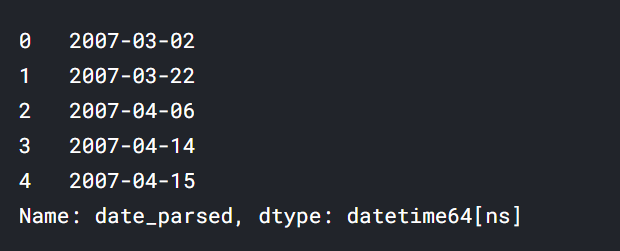

before change

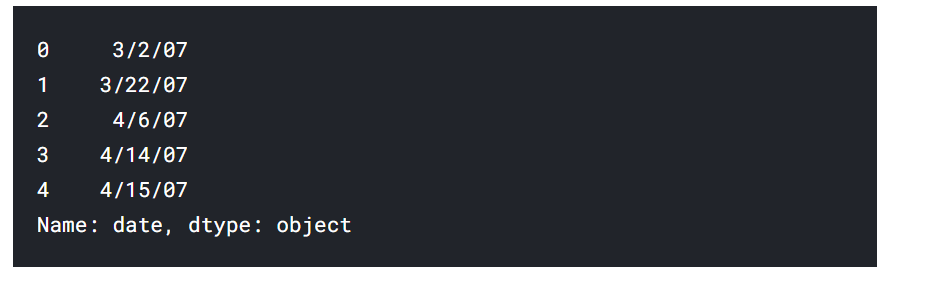


Character Encodings

Most of strings is in UTF-8 if it is in other encodings we will encounter some error



In [ ]:
# look at the first ten thousand bytes to guess the character encoding
with open("../input/kickstarter-projects/ks-projects-201801.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

Inconsistent Data Entry 

fuzzywuzzy package

Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "d.i khan".

Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.